In [10]:
import os
from pathlib import Path

# file_path=Path('E:/test/midpoint')
# file_name="sc016_0630_001_10sWhisking.mp4"
# base_name="sc016_0630_001"
script_path=Path('C:/Code/whisker_pipeline/Python')
nproc=16
file_path=Path('E:\mw_test')
file_name="MRN-TelC2-wholeW_10sWhisking.mp4"
base_name="MRN-TelC"

midpoint_data = file_path / file_name.replace(".mp4", "_midpoint.csv")


In [3]:
#  Load the midpoint data
import pandas as pd
midpoint = pd.read_csv(midpoint_data, index_col=0)
midpoint

,fid,midpoint_left,midpoint_right
0,0,81.500740,-74.208670
1,1,86.303870,-86.088810
2,2,82.783800,-83.947280
3,3,86.043210,-79.340010
4,4,80.850090,-84.120590
...,...,...,...
195,195,82.085400,-41.468540
196,196,83.926610,-73.765010
197,197,86.250885,-67.555214
198,198,78.948840,-81.882286


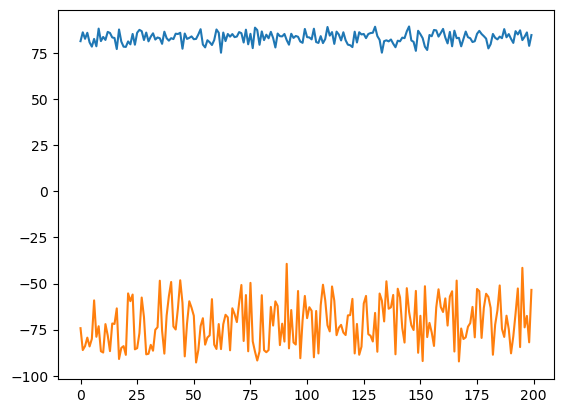

In [4]:
#  Plot midpoint_left and midpoint_right
import matplotlib.pyplot as plt
import numpy as np
plt.plot(midpoint['midpoint_left'])
plt.plot(midpoint['midpoint_right'])
plt.show()


In [17]:
# import WhiskiWrap
tracking_folder = str(file_path / "WT")
whiskers_file = f"{base_name}_left_00000000.whiskers"
# measurements = WhiskiWrap.read_whisker_data(whiskers_file)

# !docker run --rm -v "{tracking_folder}:/data" wanglabneuro/whisk-ww:latest python -c "from WhiskiWrap import WhiskiWrap; measurements = WhiskiWrap.read_whisker_data('/data/{whiskers_file}')"

import pandas as pd
import json
tracking_folder = str(file_path / "WT")
whiskers_file = f"{base_name}_left_00000000.whiskers"
output_file = "measurements.json"

!docker run --rm -v "{tracking_folder}:/data" wanglabneuro/whisk-ww:latest python -c "from WhiskiWrap import WhiskiWrap; import json; measurements = WhiskiWrap.read_whisker_data('/data/{whiskers_file}'); with open('/data/{output_file}', 'w') as f: json.dump(measurements, f)"with open(f"{tracking_folder}/{output_file}", 'r') as f:

with open(f"{tracking_folder}/{output_file}", 'r') as f:
    measurements = json.load(f)